# 프로젝트 : 문자를 읽을 수 있는 딥러닝
**갤럭시에서 제공하는 책의 내용을 촬영하면 데이터로 변환해주는 기능은 언제봐도 신기합니다.**

## 1. 데이터 준비하기

## 2. OCR 테스트

## 3. 결론

In [ ]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


- - -
### 데이터 준비하기

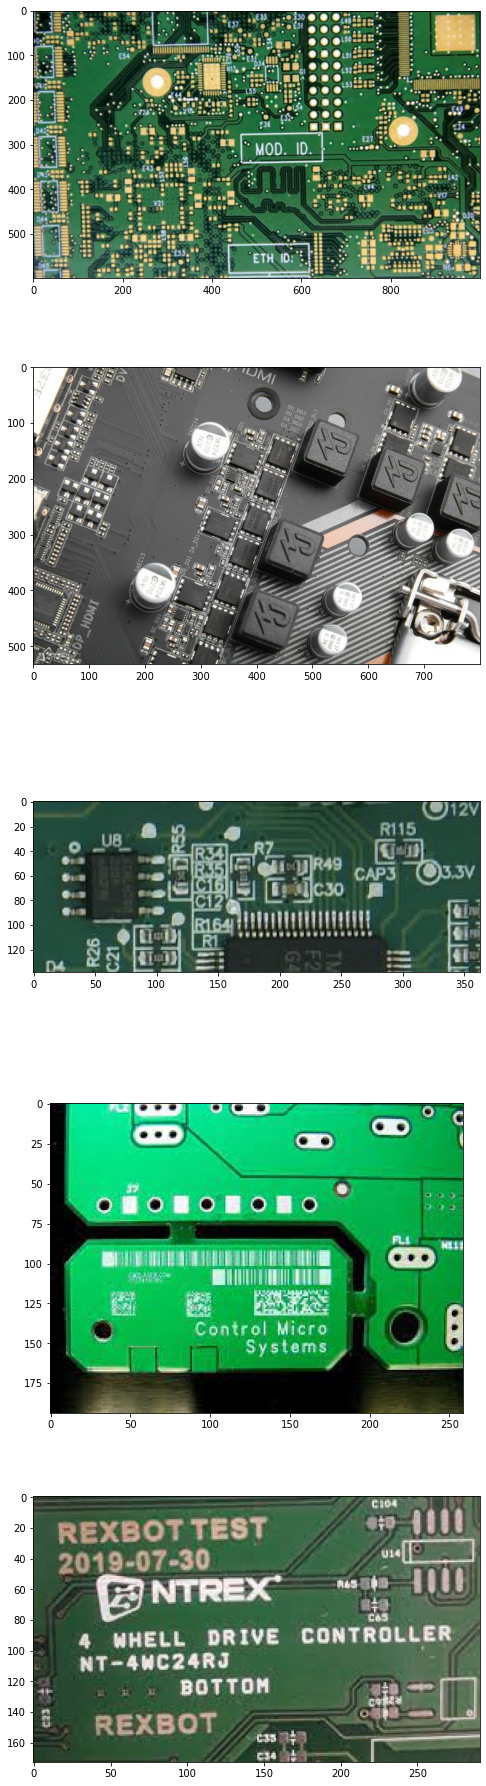

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import glob, os

img_path = os.getenv('HOME') + '/aiffel/EXPLORATION/img/'
images_path = glob.glob(img_path + '/*.png')  

fig, axs = plt.subplots(nrows=len(images_path), figsize=(8, 33))
for idx, ax in enumerate(axs):
    plt.subplot(len(images_path), 1, idx+1)
    img = Image.open(images_path[idx])
    plt.imshow(img)
    
plt.show()

제가 준비한 이미지들입니다.

그렇습니다. 전부 인쇄회로기판(PCB)입니다.

기판을 보시면 안에 하얀 글씨들이 있는데요. 이건 주로 **마킹**이라고 부르는데,

PCB의 일련번호나 단자의 ID를 표시하는 역할을 하기도 합니다.

그래서 저는 OCR을 이용해 PCB의 마킹을 읽어 PCB의 정보를 추출하고 출력해주는 서비스를 만든다고 가정해보겠습니다.

- - -
### OCR 테스트

### *keras_ocr*

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read(path) for path in images_path]
prediction_groups = [pipeline.recognize([path]) for path in images_path]

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


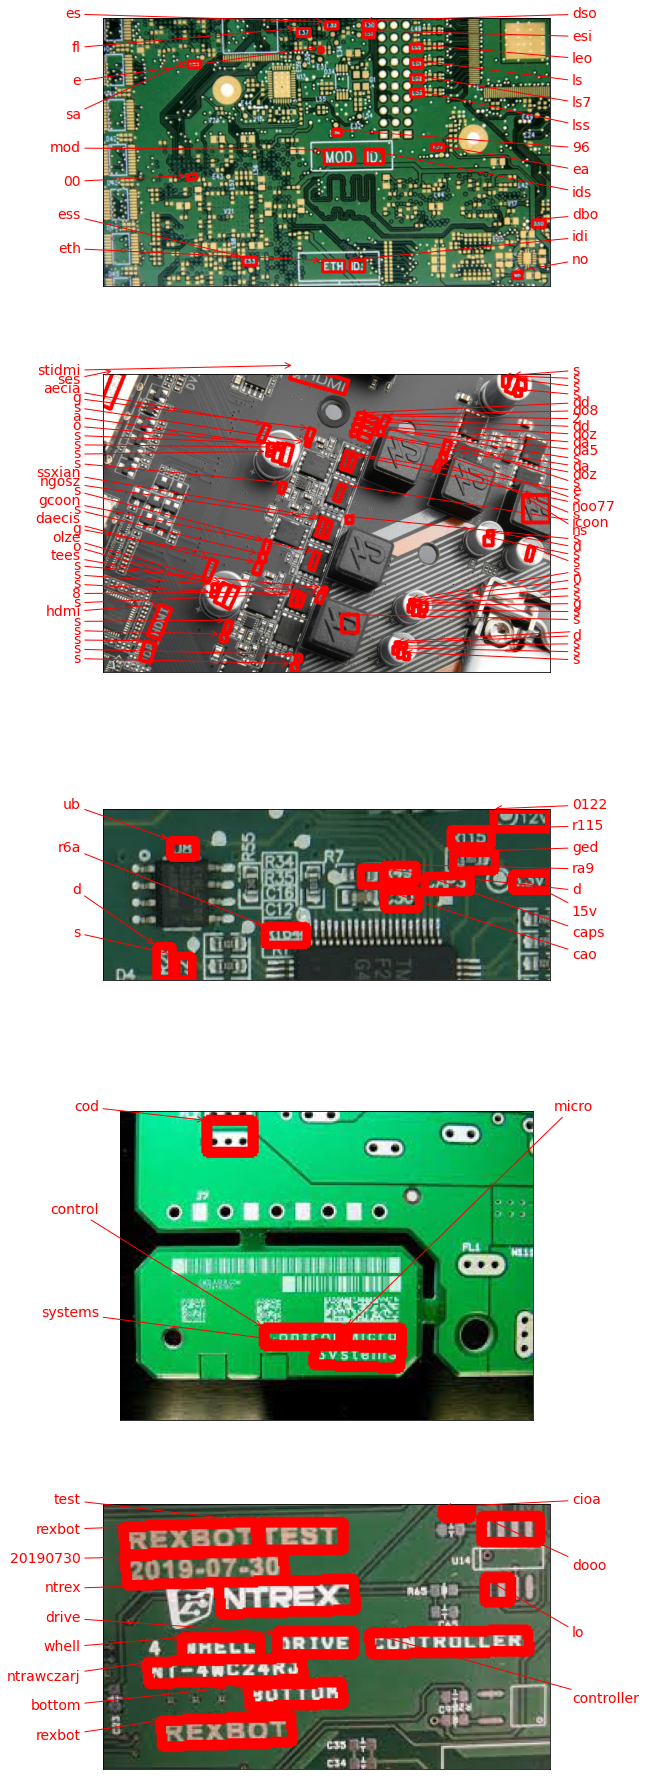

In [ ]:
fig, axs = plt.subplots(nrows=len(images), figsize=(8, 33))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0], ax=ax)

먼저 **keras_ocr**입니다.

문자 인식 결과가 좋지는 못합니다.

PCB의 마킹을 읽기 위해 중요한 능력은 작은 문자도 읽어낼 수 있어야 하는 게 관건인데요.

같은 크기인데도 어떤 것은 읽고, 어떤 것은 읽지 못했습니다.

그리고 이건 예상치 못한 부분인데 워낙 규칙적인 포인트가 많다보니 이것까지 문자로 인식해버리는 모습입니다.

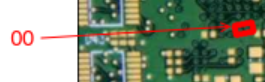

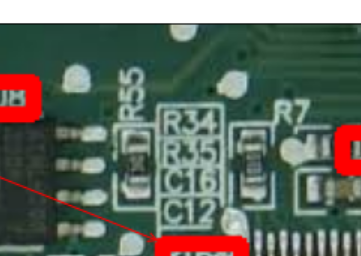

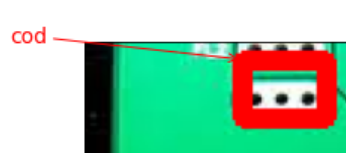

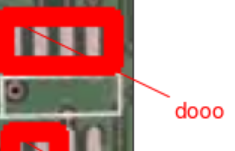

### *Tesseract*

In [ ]:
import pytesseract
import cv2

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)
    img = cv2.imread(image_path)

    recognized_data = pytesseract.image_to_data(image, 
        lang = 'eng',    # 한국어라면 lang='kor'
        config = custom_oem_psm_config,
        output_type = pytesseract.Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            if width == 0: # 인식 실패로 오류가 나서 방지용으로 추가한 코드입니다.
                width = 1
            cv2.rectangle(img, (left, top), (left + width, top + height), (0,255,0), 1, lineType=cv2.LINE_AA) # 원본 이미지에 객체 영역표시 추가
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left + width,
                top + height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
            
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # 검출된 영역을 추가한 이미지 출력
    plt.show()
            
    return cropped_image_path_list

In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    text = []
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(image, 
            lang = 'eng',    # 한국어라면 lang='kor'
            config = custom_oem_psm_config,
            output_type = pytesseract.Output.DICT
        )
        text.append(recognized_data['text'])#문장으로 만들어보고 싶었는데 잘 안됐고, 
    print(' '.join(text))                   #생각해보니 어차피 검출되는 순서가 뒤죽박죽이니 꼭 문장으로 만들어질 필요는 없겠더라구요.

/aiffel/aiffel/EXPLORATION/img/img_0/0000.png


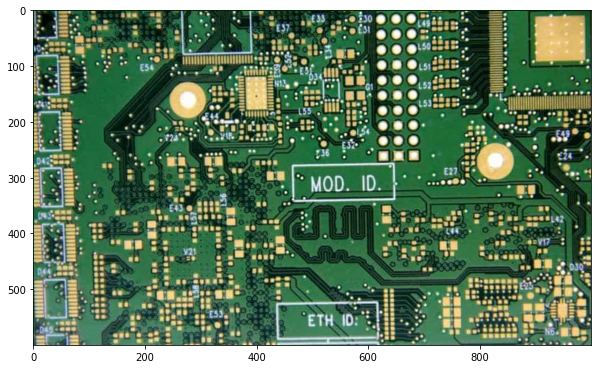


/aiffel/aiffel/EXPLORATION/img/img_1/0000.png


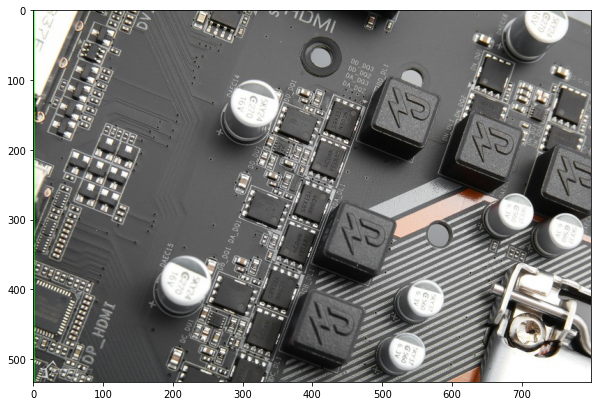


/aiffel/aiffel/EXPLORATION/img/img_2/0000.png


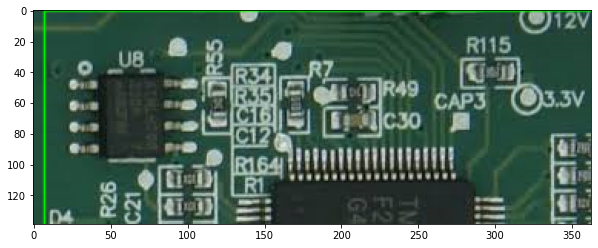

t E oe

/aiffel/aiffel/EXPLORATION/img/img_3/0000.png
/aiffel/aiffel/EXPLORATION/img/img_3/0001.png
/aiffel/aiffel/EXPLORATION/img/img_3/0002.png
/aiffel/aiffel/EXPLORATION/img/img_3/0003.png
/aiffel/aiffel/EXPLORATION/img/img_3/0004.png
/aiffel/aiffel/EXPLORATION/img/img_3/0005.png


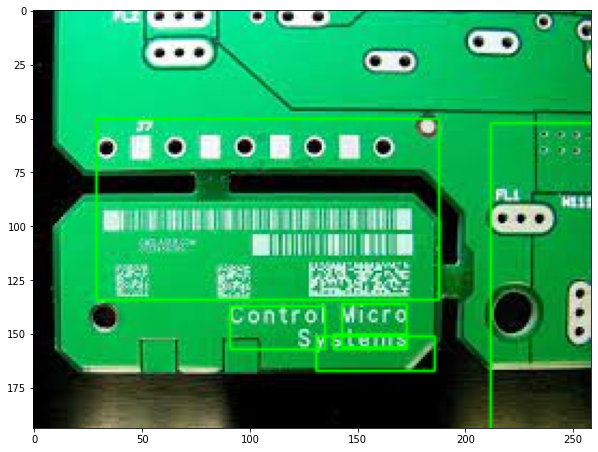

 rule
 spiaisbe
 SLeiis
 13 Seeceges
 
/aiffel/aiffel/EXPLORATION/img/img_4/0000.png
/aiffel/aiffel/EXPLORATION/img/img_4/0001.png
/aiffel/aiffel/EXPLORATION/img/img_4/0002.png
/aiffel/aiffel/EXPLORATION/img/img_4/0003.png
/aiffel/aiffel/EXPLORATION/img/img_4/0004.png
/aiffel/aiffel/EXPLORATION/img/img_4/0005.png
/aiffel/aiffel/EXPLORATION/img/img_4/0006.png
/aiffel/aiffel/EXPLORATION/img/img_4/0007.png
/aiffel/aiffel/EXPLORATION/img/img_4/0008.png
/aiffel/aiffel/EXPLORATION/img/img_4/0009.png
/aiffel/aiffel/EXPLORATION/img/img_4/0010.png
/aiffel/aiffel/EXPLORATION/img/img_4/0011.png
/aiffel/aiffel/EXPLORATION/img/img_4/0012.png
/aiffel/aiffel/EXPLORATION/img/img_4/0013.png
/aiffel/aiffel/EXPLORATION/img/img_4/0014.png
/aiffel/aiffel/EXPLORATION/img/img_4/0015.png
/aiffel/aiffel/EXPLORATION/img/img_4/0016.png
/aiffel/aiffel/EXPLORATION/img/img_4/0017.png
/aiffel/aiffel/EXPLORATION/img/img_4/0018.png
/aiffel/aiffel/EXPLORATION/img/img_4/0019.png
/aiffel/aiffel/EXPLORATION/img/img_

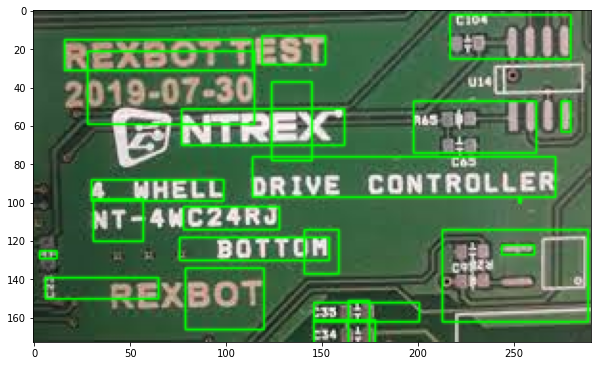

REXBOT T
 +B
 Ty
  NTREX
  eh
  4& WHELL
 ETT eT bat ine.
 ie
 lore ot)
 :
 =>
 BOTTOM
  tie ial
 —-)—
 BOT
 — ) _ a
 ol
 = ee
 ‘



In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)

for idx, img_file_path in enumerate(images_path):
    work_dir = img_path + f'img_{idx}'
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    recognize_images(cropped_image_path_list)

테서렉트 모델의 문자 인식 결과입니다.

뭔가 문제가 있었는지 문자 검출이 지 멋대로입니다.

기껏 검출된 객체 영역을 표시해주게끔 만들었으나 오히려 형편없는 결과만 두드러지게 나타내버리고 말았습니다.

- - -
### 결론

PCB의 마킹을 읽어내는 데엔 **tesseract**보다 **keras_ocr**이 더 나은 모습을 보여주긴 했지만

현재로선 이대로 서비스를 시작하기엔 큰 무리가 있어보입니다.

검출 자체도 제대로 성공하지 못한 테서렉트는 일단 배제하고 케라스ocr을 기준으로 결론을 말하자면

문자이긴 문자이지만 짧게 끝나는 이니셜같은 단어를 문자로 인식하지 못한 것 같습니다.

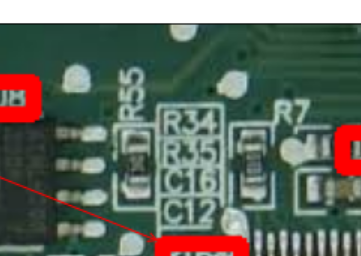

그리고 규칙적이기만 한 문양도 문자로 읽어내는 것 또한 굉장히 큰 취약점이라고 볼 수 있겠네요.

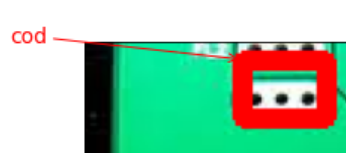

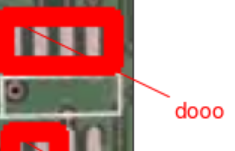

문자를 검출하는 단계에서 생기는 문제 뿐만 아니라 문자를 읽어내는 단계에서도 문제가 있습니다.

작은 문자는 검출에 성공해도 식별하는 과정에서 정확도가 떨어지는 모습입니다.

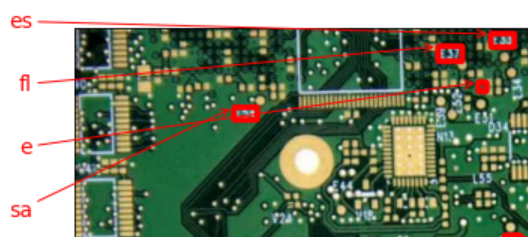

테서렉트 모델의 PCB 마킹 인식 성능에 대해선 다룰 얘기는 없지만 그래도 장점이 없지는 않습니다.

그건 바로 한국어를 지원한다는 것 정도네요. 이 부분은 테서렉트 모델이 케라스ocr을 이겼습니다.

## 마무리하며

맞아요. PCB 제조 회사에서 근무한 적이 있습니다. 그것도 인쇄팀에서요.

그래서 고작 생각해낸 서비스가 PCB 마킹 인식 정도인데 사실 이런 서비스가 먹힐 지는 잘 모르겠습니다.

어느 부분으로 상용화할 지는 그래도 어딘가 있지 않을까 생각하고 있습니다.

Google OCR API는 신용카드 등록이 못미더워서 안했습니다.

그게 아니여도 keras_ocr과 테서렉트만으로도 기대하는 결과는 나올 수 있을거라 생각했는데 준비된 ocr모델이 생각보다 성능이 좋진 않았네요.

제가 사용해본 두 모델 모두 문자를 읽는 것보다 문자로 인식하는 것이 더 어렵나봅니다.

마지막으로 궁금했던 이미지를 ocr에 넣어보고 마무리하겠습니다.

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

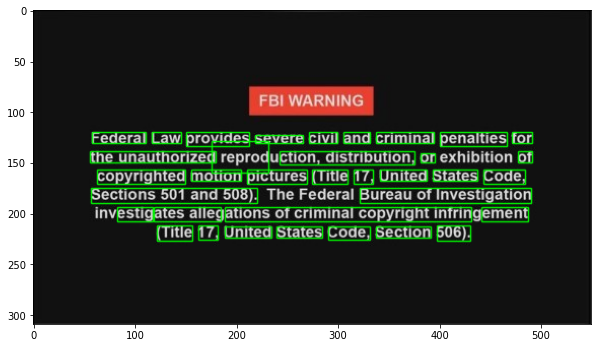

Federal
 Bei
 provides
 — on £4 oS
 Civil
 and
 criminal
 penalties
 ror
 tne unautnorizveda
 Tears:
 ction, distribution,
 els
 OT
 copyrighted
 motion
 pictures
 (Title
 ive
 Bistitue
 States
 Code,
 sections 501 and 508).
 Bureau of Investigation
 estig
 rosie i iat
 ations oT criminal copyright intrin
 ement
 tic:
 ‘we
 United
 iets
 Lode,
 Section
 ol) 3)



In [ ]:
work_dir = os.getenv('HOME') + '/aiffel/ocr_python'
img_file_path = work_dir + '/WARNING.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

~~읽는 것 마저 똥이네~~